# 1. Зниження розмірності та візуалізація

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
raw_data = pd.read_csv('heart.csv')
print(raw_data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
columns = raw_data.columns
x = raw_data.loc[:, columns].values
y = raw_data.loc[:,['output']].values

# 1.1 PCA

In [4]:
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_raw_data = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])
final_pca_raw_data = pd.concat([pca_raw_data, raw_data[['output']]], axis = 1)
print(final_pca_raw_data)

          PCA 1      PCA 2  output
0    -12.267726   2.870002       1
1      2.689662 -39.873863       1
2    -42.950640 -23.639530       1
3    -10.945206 -28.441101       1
4    106.978583 -15.879436       1
..          ...        ...     ...
298   -4.553591  27.494199       0
299   16.428494  12.925387       0
300  -51.963290  13.329155       0
301 -114.755392  36.439808       0
302  -10.395712 -23.296238       0

[303 rows x 3 columns]


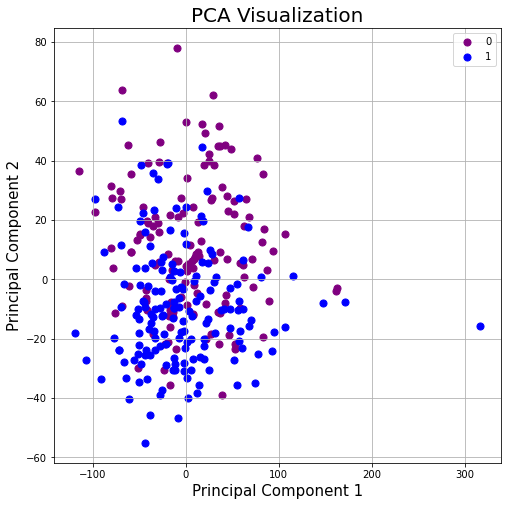

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Visualization', fontsize = 20)
targets = [0,1]
colors = ['purple', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_pca_raw_data['output'] == target
    ax.scatter(final_pca_raw_data.loc[indicesToKeep, 'PCA 1'], final_pca_raw_data.loc[indicesToKeep, 'PCA 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

# 1.2 t-SNE

In [6]:
x_std2 = StandardScaler().fit_transform(x)
tsne = TSNE(n_components=2, perplexity=40, n_iter=500, learning_rate = 200)
stochastic_neighbor = tsne.fit_transform(x_std2) 
stochastic_neighbor_raw_data = pd.DataFrame(data = stochastic_neighbor, columns = ['tsne1', 'tsne2'])
final_stochastic_neighbor_raw_data = pd.concat([stochastic_neighbor_raw_data, raw_data[['output']]], axis = 1)
print(final_stochastic_neighbor_raw_data)

        tsne1      tsne2  output
0   -9.322615   3.090563       1
1   -6.630928   4.583393       1
2    4.206998   7.866669       1
3   -1.294926   5.517328       1
4    5.641495  10.892927       1
..        ...        ...     ...
298  0.650668 -13.545386       0
299 -7.608418  -2.613445       0
300  3.721810  -6.296088       0
301 -5.468429  -8.811029       0
302  5.534488   6.482631       0

[303 rows x 3 columns]


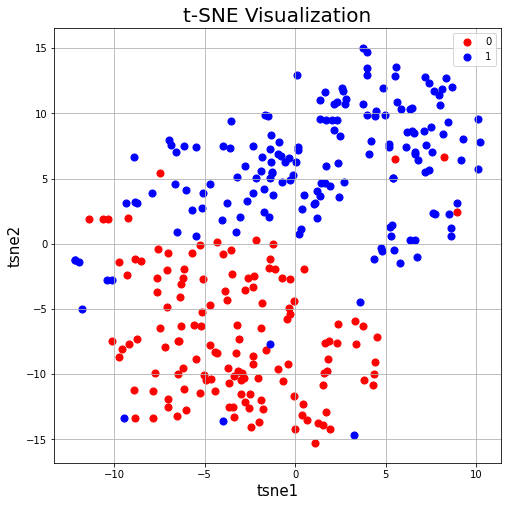

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne1', fontsize = 15)
ax.set_ylabel('tsne2', fontsize = 15)
ax.set_title('t-SNE Visualization', fontsize = 20)
targets1 = [0,1]
colors = ['red', 'blue']
for target, color in zip(targets1,colors):
    indicesToKeep = final_stochastic_neighbor_raw_data['output'] == target
    ax.scatter(final_stochastic_neighbor_raw_data.loc[indicesToKeep, 'tsne1'], final_stochastic_neighbor_raw_data.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
ax.legend(targets1)
ax.grid()
plt.show()

# 2. Кластерний аналіз

# 2.1 Квантування зображення за допомогою k-means

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

In [9]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [10]:
brist = Image.open('brist.jpg')
brist = np.array(brist, dtype=np.float64)/255

In [11]:
w, h, d = original_shape = tuple(brist.shape)
assert d == 3
image_array = np.reshape(brist, (w * h, d))

In [12]:
n_colors = [64,32,16,8]

models = []
for i in n_colors:  
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=i).fit(image_array_sample)
    models.append(kmeans)

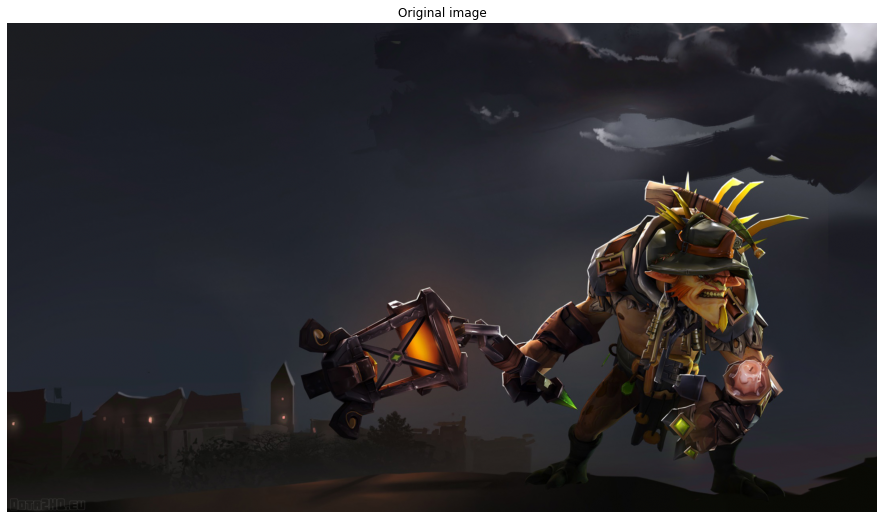

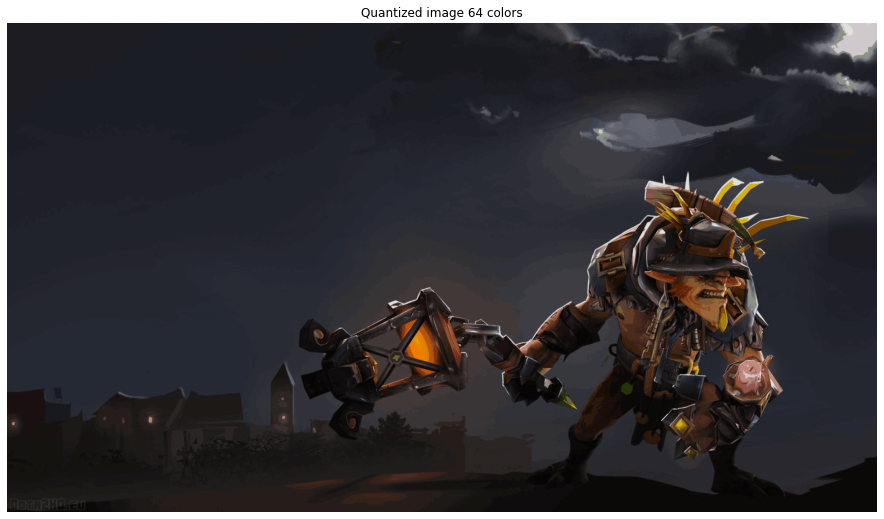

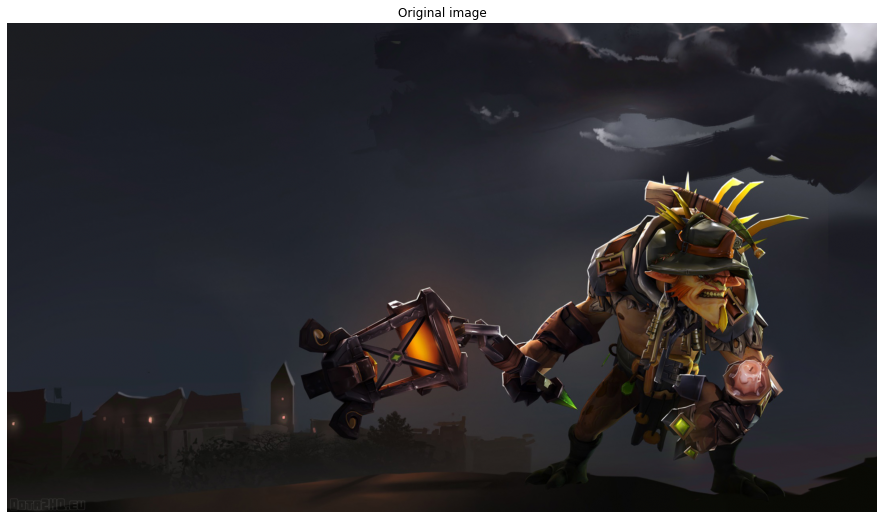

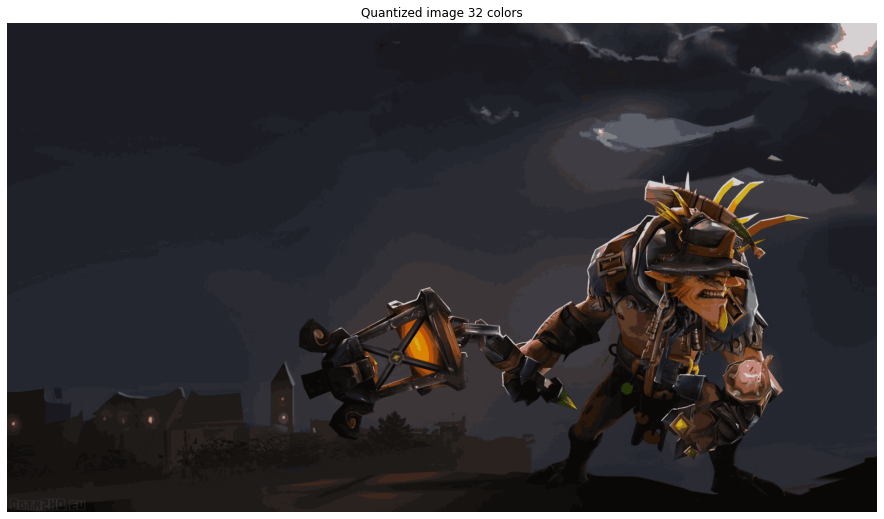

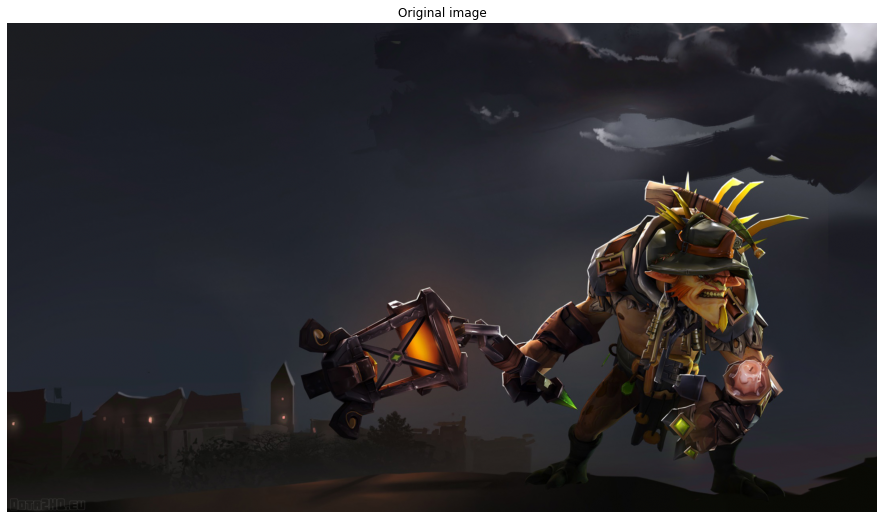

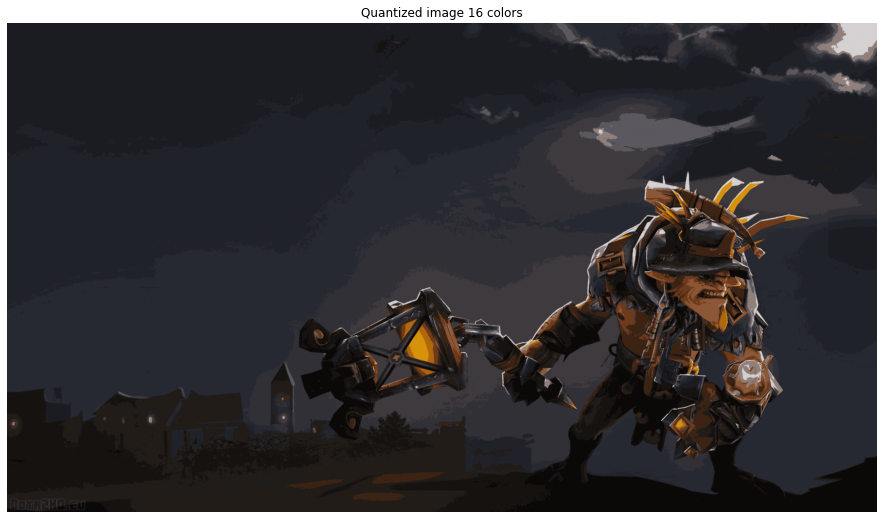

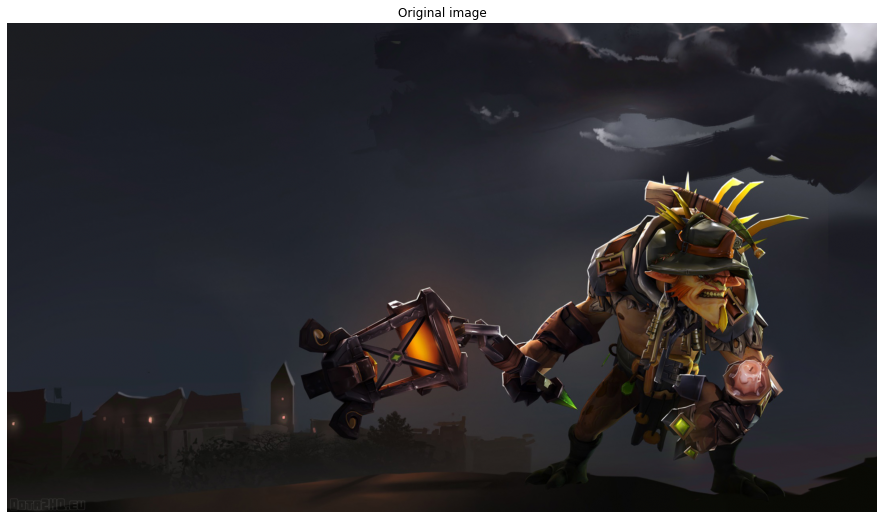

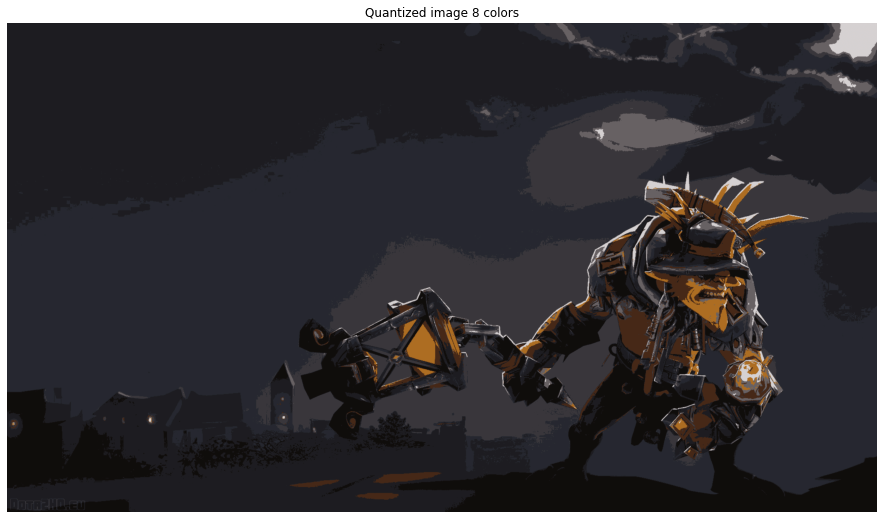

In [13]:
for model in models:
    plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(brist)
    labels = model.predict(image_array)
    plt.figure(figsize=(16,9))
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image {model.get_params().get("n_clusters")} colors')
    plt.imshow(recreate_image(model.cluster_centers_, labels, w, h))
plt.show()